In [2]:
import pandas as pd

In [3]:
iris=pd.read_csv("iris.csv")
iris.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [4]:
import matplotlib.pyplot as plt
import numpy as np
#from sklearn import dataset
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing

In [5]:
label_encoder= preprocessing.LabelEncoder()
iris['Species']=label_encoder.fit_transform(iris['Species'])

In [6]:
x=iris.iloc[:,0:4]
y=iris['Species']

In [7]:
x

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [8]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [9]:
iris['Species'].unique()

array([0, 1, 2])

In [10]:
iris.Species.value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

In [11]:
colnames=list(iris.columns)
colnames

['Unnamed: 0',
 'Sepal.Length',
 'Sepal.Width',
 'Petal.Length',
 'Petal.Width',
 'Species']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

## Build Decision Tree Classifier using entropy criterian

In [13]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(133.92000000000002, 181.2, 'X[3] <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[0] <= 100.5\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]')]

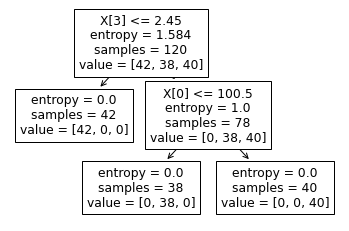

In [14]:
tree.plot_tree(model)

[Text(372.0, 755.0, 'petal width (cm) <= 2.45\nentropy = 1.584\nsamples = 120\nvalue = [42, 38, 40]\nclass = setosa'),
 Text(186.0, 453.0, 'entropy = 0.0\nsamples = 42\nvalue = [42, 0, 0]\nclass = setosa'),
 Text(558.0, 453.0, 'sepal length (cm) <= 100.5\nentropy = 1.0\nsamples = 78\nvalue = [0, 38, 40]\nclass = verginica'),
 Text(372.0, 151.0, 'entropy = 0.0\nsamples = 38\nvalue = [0, 38, 0]\nclass = versicolor'),
 Text(744.0, 151.0, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40]\nclass = verginica')]

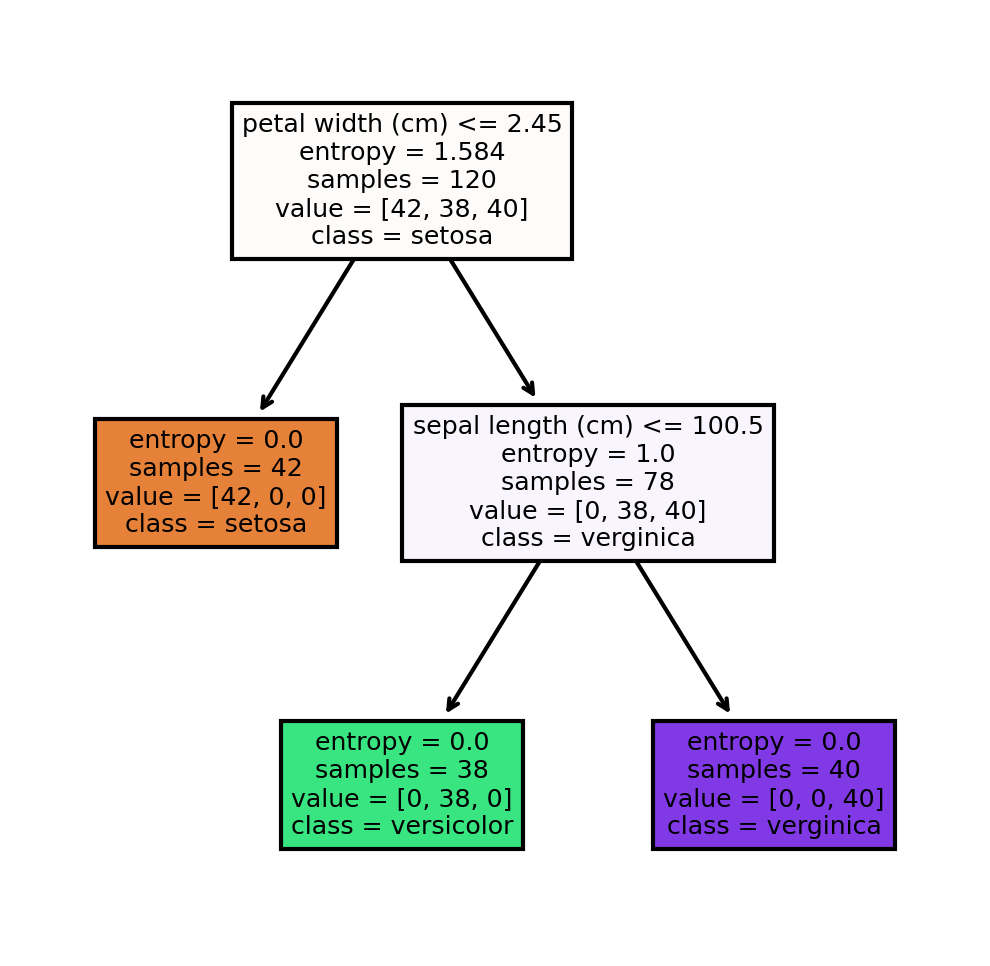

In [17]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','verginica']
fig, axes=plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [18]:
# predicting on test data
preds=model.predict(x_test)

In [19]:
pd.Series(preds).value_counts()

1    12
2    10
0     8
dtype: int64

In [20]:
preds

array([0, 1, 2, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       1, 0, 1, 0, 0, 2, 0, 1])

In [24]:
pd.crosstab(y_test,preds)

col_0,0,1,2
Species,,,
0,8,0,0
1,0,12,0
2,0,0,10


In [25]:
#Accuracy
np.mean(preds==y_test)

1.0

## Build Decision Tree Classifier (CART) using Gini criteria

In [26]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [27]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [28]:
pred=model.predict(x_test)
np.mean(preds==y_test)

1.0

### Decision Tree Regression example

In [29]:
from sklearn.tree import DecisionTreeRegressor

In [30]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [32]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
#Find the accuracy
model.score(X_test,y_test)

0.9608330941217746